In [126]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim

import matplotlib.pyplot as plt
%matplotlib inline

data_size = 1000
X1 = torch.randn(data_size, 8)
X2 = torch.randn(data_size, 8) + 2

X = torch.cat([X1, X2], dim=0) # concatnate 合并张量

Y1 = torch.zeros(data_size, 1) # X1 - 0
Y2 = torch.ones(data_size, 1) # X2 - 1

Y = torch.cat([Y1, Y2], dim=0)


print(X.size())
print(Y.size())
print(X)
print(Y)

torch.Size([2000, 8])
torch.Size([2000, 1])
tensor([[ 0.2454,  3.1054,  0.4390,  ...,  0.7791,  0.2569,  0.6967],
        [-0.0234,  0.7303,  1.6700,  ...,  0.3890,  0.6373,  0.0768],
        [ 0.0132,  1.1199, -0.1370,  ...,  0.8917,  0.2806,  0.0206],
        ...,
        [ 2.8783,  1.4809,  1.8695,  ...,  3.7845,  0.1110,  2.7825],
        [ 3.7573,  1.6131,  1.6971,  ...,  1.7550,  3.2176,  1.3578],
        [ 2.8822,  2.2555,  1.6109,  ...,  5.1259,  1.4430,  1.7458]])
tensor([[0.],
        [0.],
        [0.],
        ...,
        [1.],
        [1.],
        [1.]])


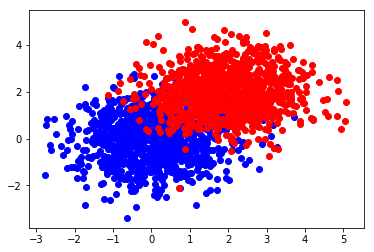

In [121]:
plt.scatter(X1[:, 0], X1[:, 1], color='b')
plt.scatter(X2[:, 0], X2[:, 1], color='r')

In [122]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(8, 8)
        self.relu1 = nn.ReLU()
        self.dout = nn.Dropout(0.1) # previous one is 0.2 
        self.fc2 = nn.Linear(8, 100) # can be adjusted 
        self.prelu = nn.PReLU(1)
        self.out = nn.Linear(100, 1)
        self.out_act = nn.Sigmoid()
        
    def forward(self, input_):
        a1 = self.fc1(input_)
        h1 = self.relu1(a1)
        dout = self.dout(h1)
        a2 = self.fc2(dout)
        h2 = self.prelu(a2)
        a3 = self.out(h2)
        y = self.out_act(a3)
        return y
    
net = Net()
opt = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999)) # turing the learn rate? 
criterion = nn.BCELoss()

In [123]:
def train_epoch(model, opt, criterion, batch_size=50): # batch_size = 50
    model.train()
    losses = []
    for beg_i in range(0, X.size(0), batch_size):
        x_batch = X[beg_i:beg_i + batch_size, :]
        y_batch = Y[beg_i:beg_i + batch_size, :]
        x_batch = Variable(x_batch)
        y_batch = Variable(y_batch)

        opt.zero_grad()
        # (1) Forward
        y_hat = net(x_batch)
        # (2) Compute diff
        loss = criterion(y_hat, y_batch)
        # (3) Compute gradients
        loss.backward()
        # (4) update weights
        opt.step()        
        losses.append(loss.data.numpy())
    return losses

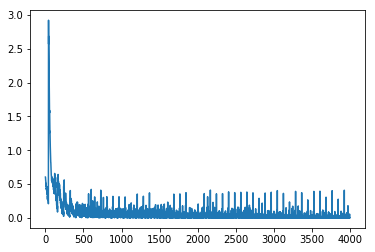

In [124]:
e_losses = []
num_epochs = 50
for e in range(num_epochs):
    e_losses += train_epoch(net, opt, criterion)
plt.plot(e_losses)

In [125]:
x_t = Variable(torch.randn(1, 8))
# net.eval()
print(net(x_t))
x_1_t = Variable(torch.randn(1, 8) + 2)
print(net(x_1_t))

tensor([[9.2135e-15]], grad_fn=<SigmoidBackward>)
tensor([[1.0000]], grad_fn=<SigmoidBackward>)
